In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import osmnx as ox
from shapely.geometry import Point
from pyproj import Transformer
import osmnx.folium as ox_folium

sns.set_context(context='paper')

%matplotlib inline

In [3]:
lat, lon = 33.85015, -84.36312
point = Point(lon, lat)

In [4]:
gdf_point = gpd.GeoDataFrame([{'geometry': point}], crs="EPSG:4326")

In [5]:
transformer = Transformer.from_crs("EPSG:4326", "EPSG:3857")
x, y = transformer.transform(lat, lon)

In [6]:
gdf_point_proj = gdf_point.to_crs(epsg=3857)
gdf_buffer = gdf_point_proj.buffer(2000)

In [7]:
gdf_buffer = gdf_buffer.to_crs(epsg=4326)
bbox = gdf_buffer.total_bounds

In [8]:
tags = {'highway': ["motorway", "trunk", "primary", "secondary", "tertiary", "residential"]}
roads = ox.geometries_from_bbox(bbox[3], bbox[1], bbox[2], bbox[0], tags)

C:\Users\synnp\AppData\Local\Temp\ipykernel_10928\2412427947.py:2: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  roads = ox.geometries_from_bbox(bbox[3], bbox[1], bbox[2], bbox[0], tags)
c:\Users\synnp\AppData\Local\Programs\Python\Python312\Lib\site-packages\osmnx\geometries.py:48: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  return features.features_from_bbox(north, south, east, west, tags=tags)
c:\Users\synnp\AppData\Local\Programs\Python\Python312\Lib\site-packages\osmnx\geometries.py:48: Future

In [9]:
G = ox.graph_from_bbox(north=bbox[3], south=bbox[1], east=bbox[2], west=bbox[0], network_type='all')

C:\Users\synnp\AppData\Local\Temp\ipykernel_10928\1445552426.py:1: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G = ox.graph_from_bbox(north=bbox[3], south=bbox[1], east=bbox[2], west=bbox[0], network_type='all')
C:\Users\synnp\AppData\Local\Temp\ipykernel_10928\1445552426.py:1: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = ox.graph_from_bbox(north=bbox[3], south=bbox[1], east=bbox[2], west=bbox[0], network_type='all')


In [10]:
edges = ox.graph_to_gdfs(G, nodes=False)

<Axes: >

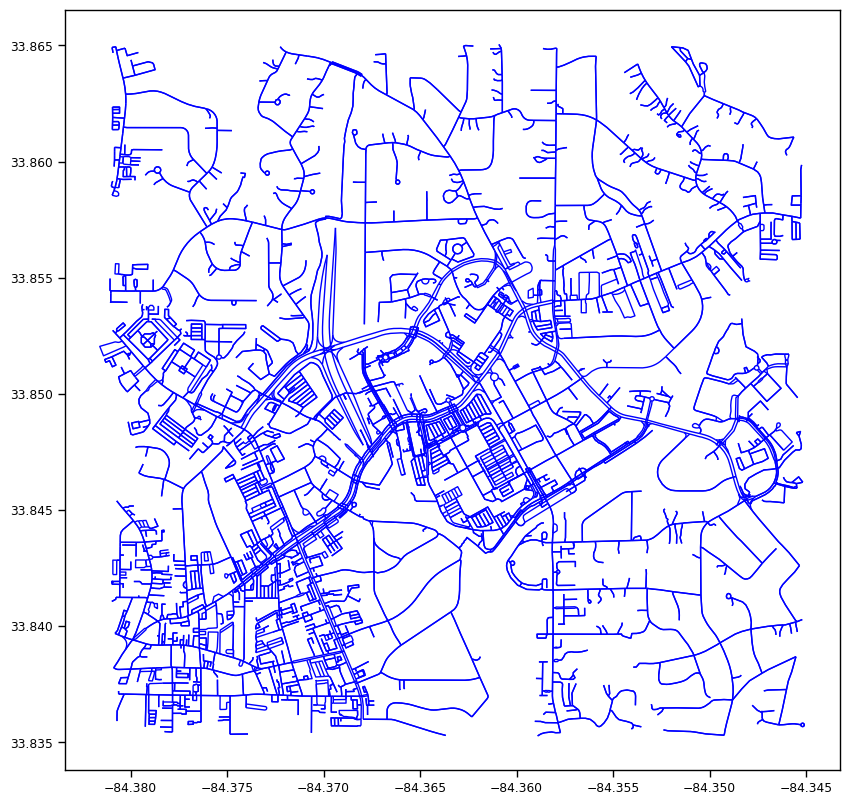

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))
edges.plot(ax=ax, linewidth=1, edgecolor='blue')

In [12]:
ctx = ox_folium.plot_graph_folium(G, popup_attribute='highway', tiles='openstreetmap')

C:\Users\synnp\AppData\Local\Temp\ipykernel_10928\3413078600.py:1: FutureWarning: The `folium` module has been deprecated and will be removed in the v2.0.0 release. You can generate and explore interactive web maps of graph nodes, edges, and/or routes automatically using GeoPandas.GeoDataFrame.explore instead, for example like: `ox.graph_to_gdfs(G, nodes=False).explore()`. See the OSMnx examples gallery for complete details and demonstrations.
  ctx = ox_folium.plot_graph_folium(G, popup_attribute='highway', tiles='openstreetmap')


In [13]:
ctx

In [25]:
roads.head()

highway  \
element_type osmid                  
way          9164044  residential   
             9164604  residential   
             9165504  residential   
             9166917  residential   
             9167293  residential   

                                                               geometry  \
element_type osmid                                                        
way          9164044  LINESTRING (-84.34827 33.85987, -84.34773 33.8...   
             9164604  LINESTRING (-84.34599 33.85116, -84.34602 33.8...   
             9165504  LINESTRING (-84.34592 33.85129, -84.34595 33.8...   
             9166917  LINESTRING (-84.34607 33.85153, -84.34606 33.8...   
             9167293  LINESTRING (-84.34547 33.84020, -84.34555 33.8...   

                                            name  ref access  \
element_type osmid                                             
way          9164044    Bellaire Drive Northeast  NaN    NaN   
             9164604               Wexford Drive  NaN    NaN   
             9165504  Arbor Club Court Northeast  NaN    NaN   
             9166917  Arbor Club Court Northeast  NaN    NaN   
             9167293   Tall Tree Drive Northeast  NaN    NaN   

                     traffic_signals:direction  \
element_type osmid                               
way          9164044                       NaN   
             9164604                       NaN   
             9165504                       NaN   
             9166917                       NaN   
             9167293                       NaN   

                                                                  nodes  \
element_type osmid                                                        
way          9164044  [384325573, 68143381, 68143383, 68143384, 6814...   
             9164604  [5428749740, 68148443, 68148445, 6313487038, 6...   
             9165504       [68157534, 5604239047, 68157535, 9805354762]   
             9166917       [9805354763, 5604239048, 68172341, 68172340]   
             9167293  [68179111, 68179113, 68179116, 68179119, 68179...   

                     tiger:cfcc tiger:county tiger:name_base  ... addr:state  \
element_type osmid                                            ...              
way          9164044        A41   DeKalb, GA        Bellaire  ...        NaN   
             9164604        A41   DeKalb, GA             NaN  ...        NaN   
             9165504        A41   DeKalb, GA      Arbor Club  ...        NaN   
             9166917        A41   DeKalb, GA      Arbor Club  ...        NaN   
             9167293        A41   DeKalb, GA       Tall Tree  ...        NaN   

                     addr:street postal_code horse junction  \
element_type osmid                                            
way          9164044         NaN         NaN   NaN      NaN   
             9164604         NaN         NaN   NaN      NaN   
             9165504         NaN         NaN   NaN      NaN   
             9166917         NaN         NaN   NaN      NaN   
             9167293         NaN         NaN   NaN      NaN   

                     turn:lanes:backward maxheight:signed lanes:both_ways  \
element_type osmid                                                          
way          9164044                 NaN              NaN             NaN   
             9164604                 NaN              NaN             NaN   
             9165504                 NaN              NaN             NaN   
             9166917                 NaN              NaN             NaN   
             9167293                 NaN              NaN             NaN   

                     turn:both_ways cycleway:left:buffer  
element_type osmid                                        
way          9164044            NaN                  NaN  
             9164604            NaN                  NaN  
             9165504            NaN                  NaN  
             9166917            NaN                  NaN  
             9167